In [12]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [13]:
pd.set_option('display.max_rows', None)  # Zeilen: Zeige alle
pd.set_option('display.max_columns', None)  # Spalten: Zeige alle

In [14]:
with open('gridsearch_complete_tradeoff_area_final.pkl', 'rb') as f:
    df = pickle.load(f)
df.keys()

dict_keys(['Ergebnisse', 'final_model', 'grid_parameters'])

In [15]:
ergebnis = df["Ergebnisse"]
ergebnis = ergebnis.sort_values(by=["mean_test_precision","mean_test_recall"], ascending=[False, False])
# ergebnis = ergebnis.sort_values(by=["mean_test_recall","mean_test_precision"], ascending=[False, False])
ergebnis[ergebnis["mean_test_precision"]>0.187].head(100)

,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,param_svc__C,param_svc__gamma,param_svc__class_weight
13231,0.777094,0.824718,0.187031,0.197242,0.55,0.011,"{0: 1, 1: 9}"


In [16]:
def plot_gridsearch_results(ergebnisframe=ergebnis, class_weight=9, elevation=20, azimut = 20): # 3D-Plot erstellen
    # filtern auf class-weight-einträge
    df_temp = ergebnisframe[ergebnisframe["param_svc__class_weight"].apply(lambda x: list(x.values())[1] == class_weight)]
    # sortieren
    df_sorted = df_temp.sort_values(by=["param_svc__C", "param_svc__gamma"], ascending=True)
    
    # Werte extrahieren
    C_values = df_sorted['param_svc__C']
    gamma_values = df_sorted['param_svc__gamma']
    recall_values = df_sorted['mean_test_recall']
    precision_values = df_sorted['mean_test_precision']
    
    # 3D-Plot erstellen
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    
    # 3D-Scatterplot
    scatter = ax.scatter(C_values, gamma_values, recall_values, c=precision_values, cmap='viridis', s=50, edgecolors='none', alpha=0.8)
    
    # Achsentitel hinzufügen
    ax.set_xlabel('C')
    ax.set_ylabel('Gamma')
    ax.set_zlabel('Recall Strokes auf Testmenge')
    ax.set_title('GridSearch Ergebnise')
    
    # # Farblegende hinzufügen und verkleinern
    colorbar = fig.colorbar(scatter, label='Precision Strokes auf Testmenge', fraction=0.02)
    colorbar.ax.tick_params(labelsize=10)  # Textgröße der Farblegende ändern
    
    # Drehwinkel für beide Plots setzen
    ax.view_init(elev=elevation, azim=azimut)
    
    # Anzeigen des Plots
    plt.show()

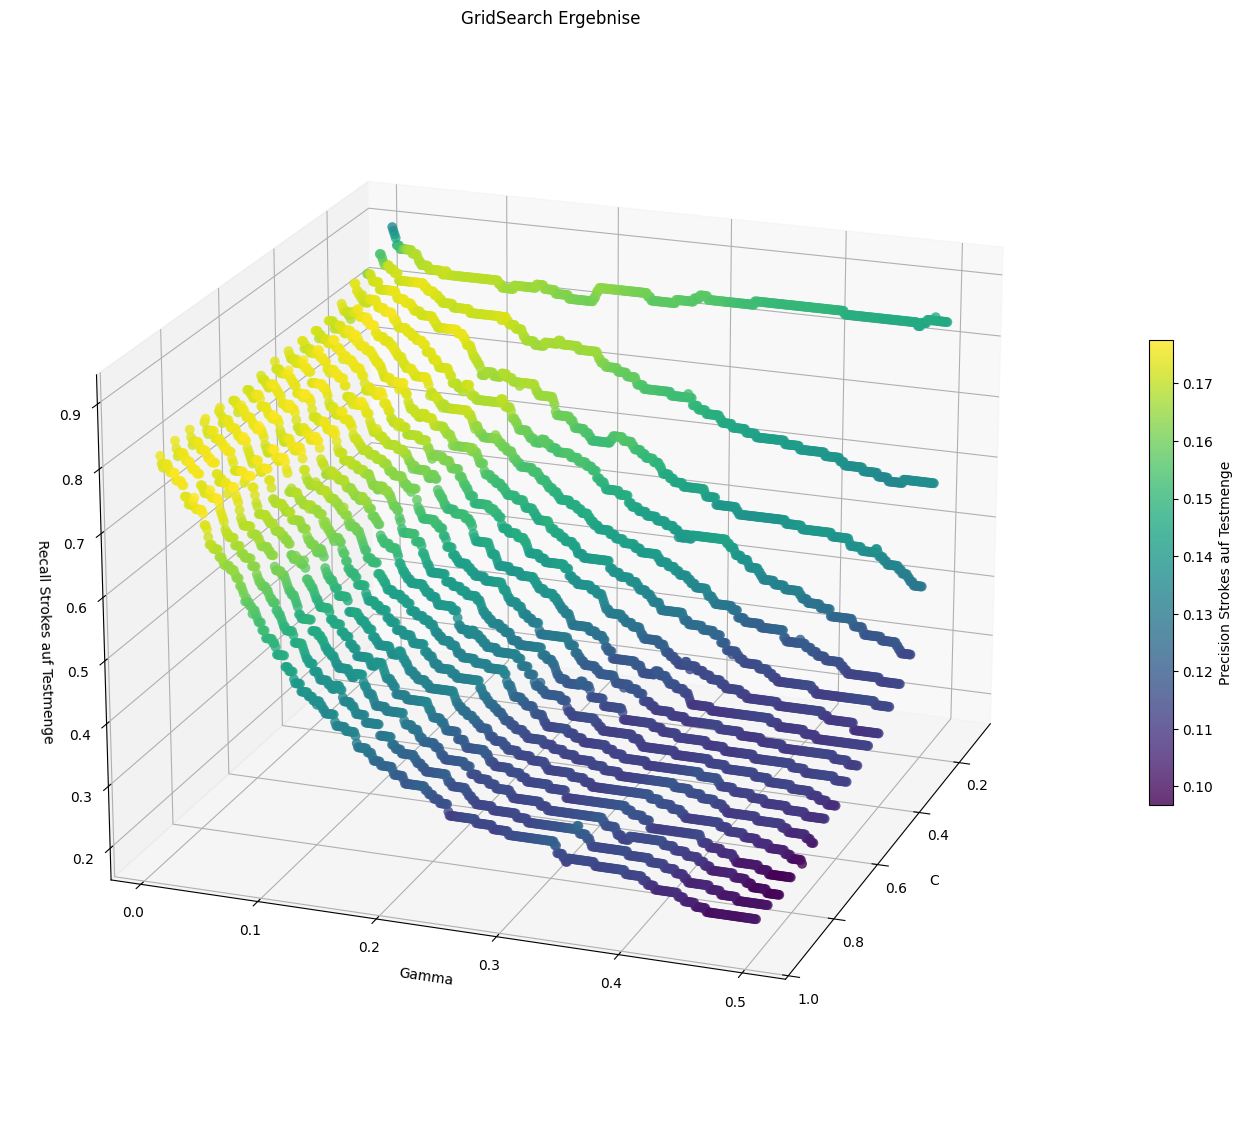

In [26]:
plot_gridsearch_results(class_weight=11, elevation=20, azimut = 20)

# Erstellung finales Modell
Wir wählen die Parameter gamma = 0.16, C=0.1, class_weight = {0:1, 1:10} und speichern das Modell als Pipeline (mit Scaler) mit pickle ab

In [7]:
svc = SVC(C=0.1  
          , kernel='rbf'  
          , gamma= 0.16
          , probability=True 
          , class_weight={0: 1, 1: 10}  
          , decision_function_shape='ovo'  
          , break_ties=False 
          , random_state=42)

In [8]:
scaler = StandardScaler()

In [9]:
svc_pipeline = Pipeline([('scaler', StandardScaler()), ('svc', svc)])

In [10]:
with open('FINALES_MODELL_SVC.pkl', 'wb') as data:
    # Einpacken von allen vorbereiteten Daten
    pickle.dump(svc_pipeline, data, pickle.HIGHEST_PROTOCOL)